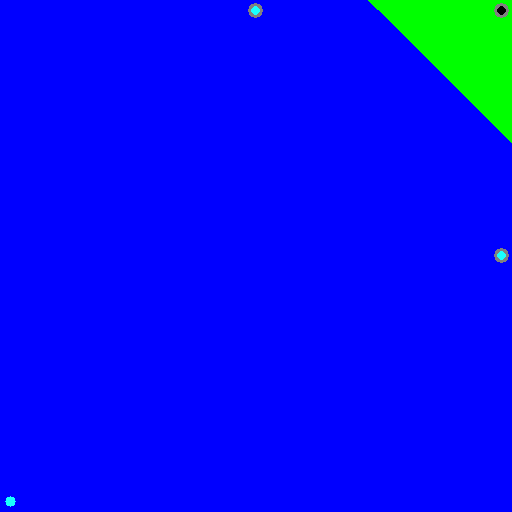

the number of support vectors:3


In [0]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Set up training data
# (1) basic example:C=1
labels = np.array([1, -1, -1, -1])
trainingData = np.matrix([[501, 10], [255, 10], [501, 255], [10, 501]], dtype=np.float32)

# (2) 4-point example:C=1
#labels = np.array([1, 1, -1, -1])
#trainingData = np.matrix([[300, 300], [400, 301], [300, 500], [400, 499]], dtype=np.float32)

# (3) complicated example: please try to set C=0.00001 & C=1
#labels = np.array([1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
#trainingData = np.matrix([[100, 100], [101, 200], [100, 300], [150, 200], [400, 50], [400, 100], [400, 200], [400,300], [400, 350], [500, 50], [500, 100], [500, 200], [500,300], [500, 350]], dtype=np.float32)


# Train the SVM
svm = cv.ml.SVM_create()
svm.setType(cv.ml.SVM_C_SVC)
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setTermCriteria((cv.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
#svm.setC(0.00001)
svm.setC(1)

svm.train(trainingData, cv.ml.ROW_SAMPLE, labels)

# Data for visual representation
width = 512
height = 512
image = np.zeros((height, width, 3), dtype=np.uint8)
# Show the decision regions given by the SVM
green = (0,255,0)
blue = (255,0,0)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        sampleMat = np.matrix([[j,i]], dtype=np.float32)
        response = svm.predict(sampleMat)[1]
        if response == 1:
            image[i,j] = green
        elif response == -1:
            image[i,j] = blue
# Show the training data
thickness = -1

h, w = trainingData.shape

for i in range(h):
  if labels[i] == 1:
    cv.circle(image, (trainingData[i,0],  trainingData[i,1]), 5, (  0,   0,   0), thickness)
  else:
    cv.circle(image, (trainingData[i,0],  trainingData[i,1]), 5, (  255,   255,   25), thickness)


# Show support vectors
thickness = 2
sv = svm.getUncompressedSupportVectors()
for i in range(sv.shape[0]):
    cv.circle(image, (sv[i,0], sv[i,1]), 6, (128, 128, 128), thickness)
#cv.imwrite('result.png', image) # save the image
cv2_imshow(image) # show it to the user

print('the number of support vectors:{}'.format(sv.shape[0]))

In [0]:
3